In [1]:
import pandas as pd

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [6]:
df = pd.read_csv("seoul_covid19.csv")

In [7]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,23459,75194,2021-01-24,타시도,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
1,23458,75327,2021-01-24,관악구,-,타시도 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
2,23457,75378,2021-01-24,관악구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
3,23456,75369,2021-01-24,종로구,-,병원 및 요양시설,치료중,21-01,21-01-24,1,3,2021-03
4,23455,75356,2021-01-24,강동구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
23454,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5,2020-05
23455,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05
23456,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,20-01,20-01-30,1,5,2020-05
23457,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05


In [10]:
df["접촉력"].value_counts().head(40)

기타 확진자 접촉                 7294
감염경로 조사중                  5417
동부구치소 관련                  1175
타시도 확진자 접촉                1016
해외유입                       772
성북구 사랑제일교회 관련              641
강서구 교회 관련                  246
종로구 소재 파고다타운 관련            227
구로구 소재 요양병원/요양원 관련         226
강서구 댄스교습관련 시설              224
이태원 클럽 관련                  139
8.15서울도심집회                 126
마포구 홍대새교회 관련               109
Ace 손해보험                    98
서초구 사우나Ⅱ 관련                 86
서초구 사우나 관련                  79
송파구 소재 장애인 거주시설 관련          78
용산구 소재 건설현장 관련              77
용인시 우리제일교회 관련               74
동대문구 에이스희망케어센터 관련           72
동대문구 지혜병원 관련                71
도봉구 다나병원                    68
강남구 헬스장 관련                  66
중랑구 소재 종교시설 관련              65
양천구 소재 요양시설2 관련             55
동작구 임용단기고시 관련               54
강서구 댄스교습 연관 병원 관련           53
중랑구 실내 체육시설 Ⅱ 관련            52
병원 및 요양시설                   47
리치웨이                        47
노원구 빛가온교회 관련                46
강남구 럭키사우나 관련                45
송파구 잠언의료

In [11]:
df["접촉력"].uniqueue()

array(['감염경로 조사중', '타시도 확진자 접촉', '기타 확진자 접촉', '병원 및 요양시설', '해외유입',
       '영등포구 소재 의료기관2 관련', '종로구 소재 요양시설2 관련', '강동구 가족관련',
       '성동구 소재 거주시설/요양시설 관련', '동부구치소 관련', '강남구 소재 직장3 관련',
       '강남구 소재 사우나 관련', '성동구 소재 사우나 관련', '종로구 소재 직장 관련',
       '영등포구 소재 의료기관 관련', '양천구 소재 직장 관련', '강북구 소재 아동관련 시설',
       '강남구 소재 직장1 관련', '종로구 소재 직장관련', '상주 BTJ 열방센터 관련', '마포구 소재 종교시설',
       '종로구 소재 콜센터 관련', '서대문구 소재 의료기관/종교시설 관련', '은평구 소재 병원3 관련',
       '용산구 소재 미군기지 관련', '송파구 소재 고시텔 관련', '동대문구 소재 대학교 관련',
       '강남구 소재 어학원3 관련', '종로구 소재 사우나 관련', '동대문구 소재 현대대중사우나 관련',
       '도봉구 소재 어린이집 관련', '양천구 소재 요양시설2 관련', '동대문구 소재 역사 관련',
       '강남구 소재 직장 2 관련', '광진구 소재 요양시설 관련', '동작구 소재 직장관련',
       '서대문구 소재 종교시설 관련', '구로구 소재 요양병원/요양원 관련', '중랑구 소재 종교시설 관련',
       '강동구 소재 요양병원 관련', '양천구 소재 요양시설1 관련', '타지역 확진자 접촉',
       '관악구 소재 종교시설 관련', '영등포구 소재 장례식장 관련', '은평구 소재 병원관련', '강북구 소재 교회 관련',
       '동대문구 소재 어르신복지시설 관련', '송파구 소재 장애인 거주시설 관련', '종로구 소재 요양시설 관련',
       '강남구 소재 택시회사 관련', '마포구 소재 보험회사 관련', '기타확진자 접

In [14]:
df.loc[df["접촉력"].str.contains("조사중"),"접촉력"].unique()

array(['감염경로 조사중', '감염경로조사중'], dtype=object)

In [15]:
df.loc[df["접촉력"].str.contains("조사중"),"접촉력"] = "감염경로 조사중"

In [17]:
df.loc[df["접촉력"].str.contains("조사중"),"접촉력"].unique()

array(['감염경로 조사중'], dtype=object)

In [40]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count[contact_count.values > 100]
contact_count_top

기타 확진자 접촉             7294
감염경로 조사중              5421
동부구치소 관련              1175
타시도 확진자 접촉            1016
해외유입                   772
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Name: 접촉력, dtype: int64

<AxesSubplot:>

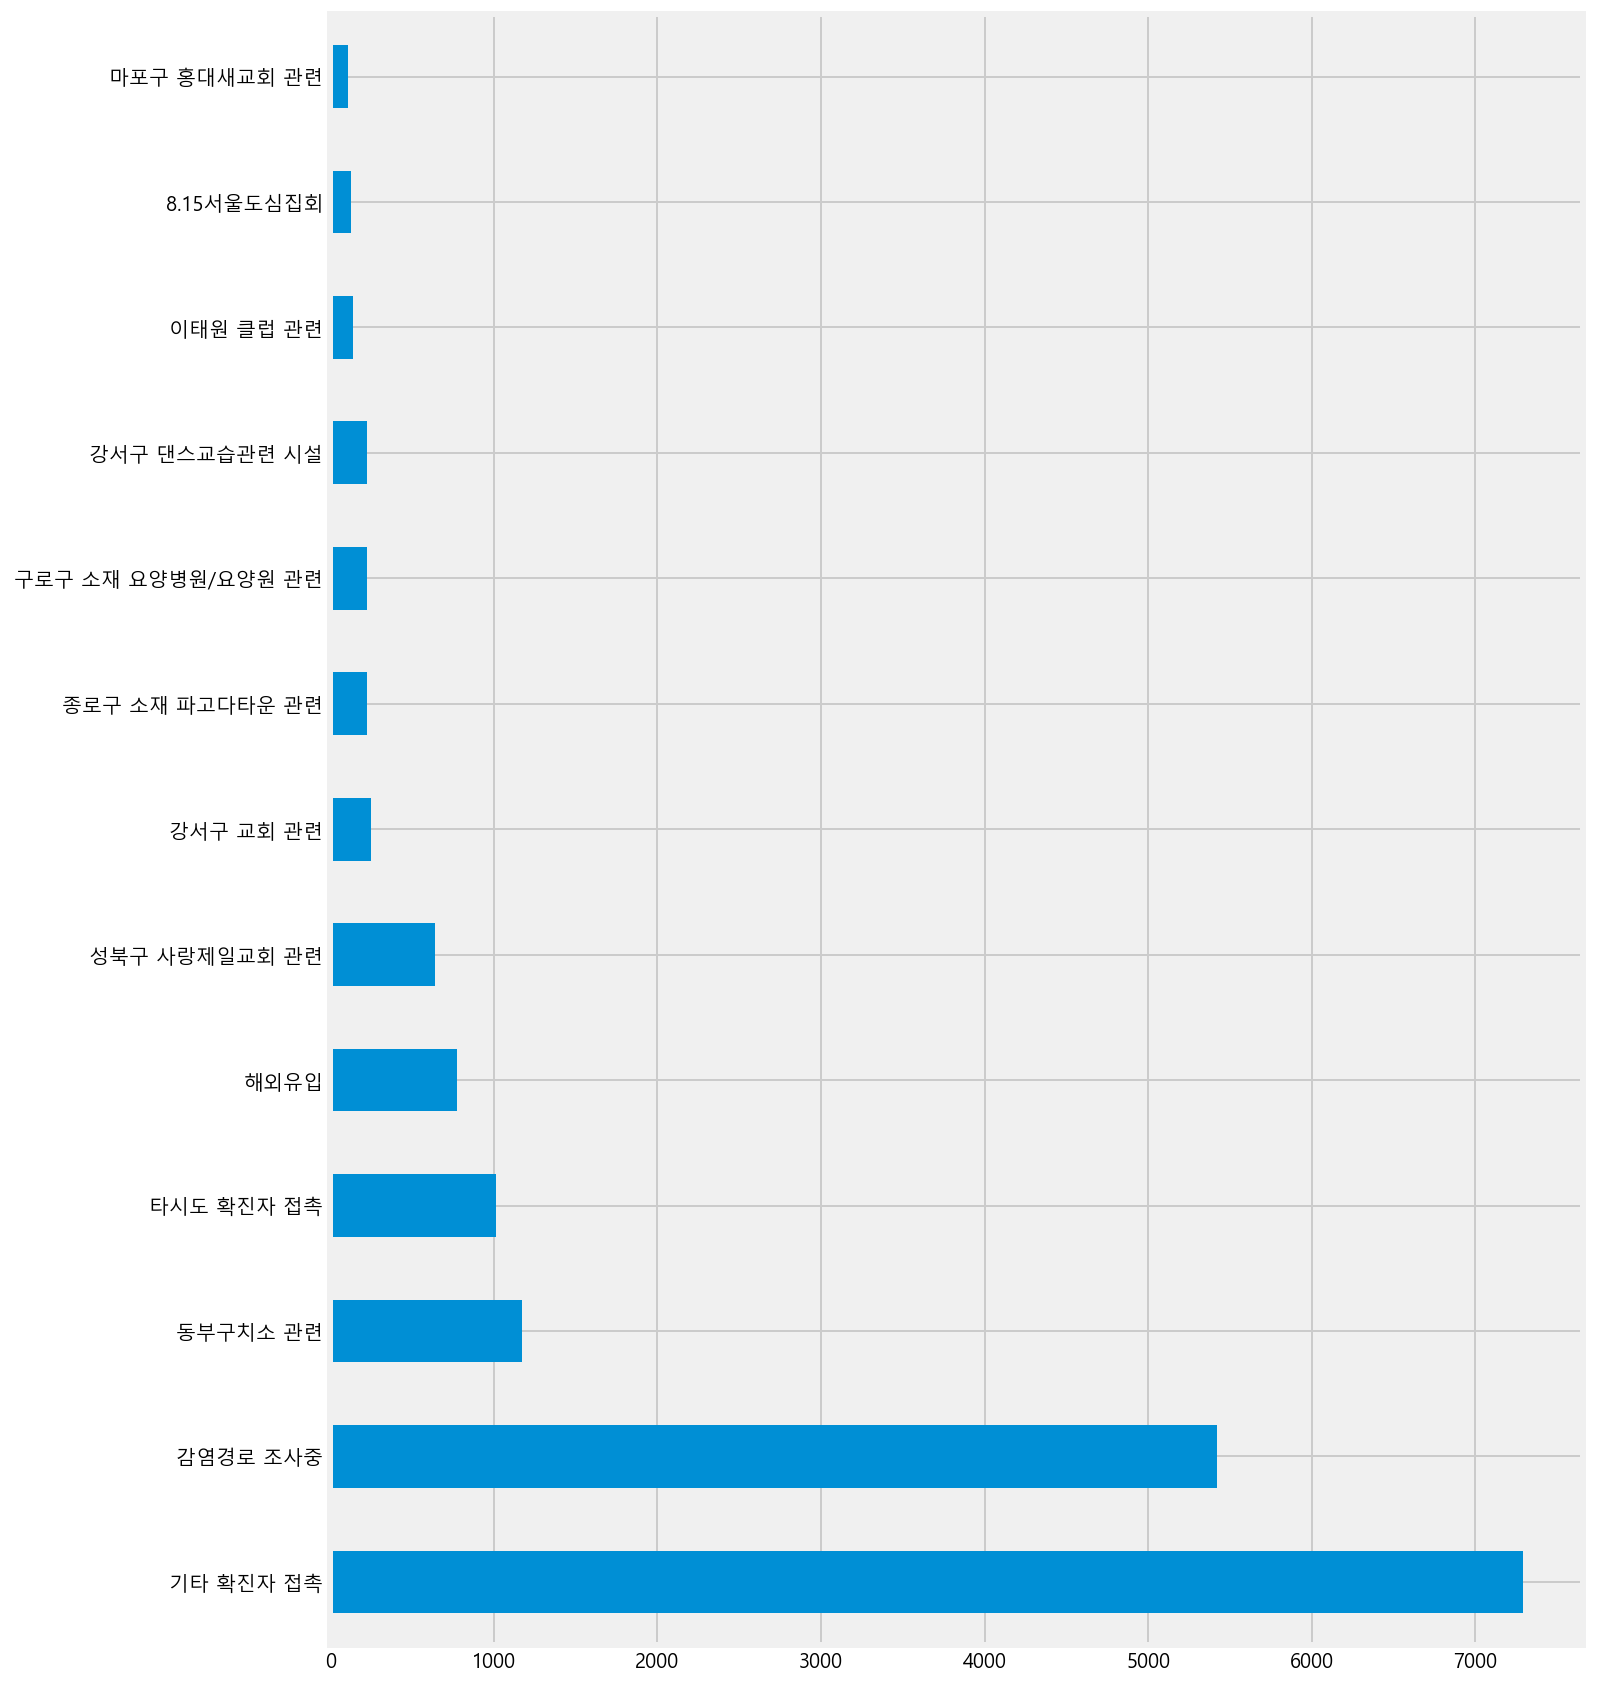

In [49]:
contact_count_top.plot.barh(figsize=(10,15))